In [1]:
import http.client

In [2]:
host = 'jooble.org'
key = '54cf1d6e-18eb-4731-9057-b336a85ffddb'

connection = http.client.HTTPConnection(host)
#request headers
headers = {"Content-type": "application/json"}
#json query
body = '{ "keywords": "it", "location": "Bern"}'
connection.request('POST','/api/' + key, body, headers)
response = connection.getresponse()
print(response.status, response.reason)
print(response.read())

200 OK
b'{"totalCount":1,"jobs":[{"title":"Customer Account Representative","location":"Seneca, KS","snippet":" Ready to do your best work?\\r\\n Interested in a minimum starting hourly rate of $13.01 per hour - $15.30 per hour  ?\\r\\n Why should I apply in just a few clicks?\\r\\n\\r\\n Paid Time Off and Sunday Off -- We are Closed!\\r\\n Full-Time Employment and a Consistent Schedule \\r\\n Weekly Pay...","salary":"","source":"raccareers.com","type":"","link":"https://jooble.org/jdp/3186309171750480452","updated":"2025-03-18T15:26:17.3400000","id":3186309171750480452}]}'


In [4]:
import requests
import json

# Your Jooble API key
API_KEY = "54cf1d6e-18eb-4731-9057-b336a85ffddb"

# API URL
URL = f"https://jooble.org/api/{API_KEY}"

# Request payload (search query)
payload = {
    "keywords": "Manager",  # Job title or keyword
    "location": "United States",   # Country or city
    "page": 1,                     # Pagination
    "searchMode": 1                # 1 = search in job descriptions
}

# Send API request
response = requests.post(URL, json=payload)

# Parse the JSON response
data = response.json()

# Print the first job description
if "jobs" in data:
    for job in data["jobs"][:1]:  # Print first 5 job descriptions
        print(f"Title: {job['title']}\nDescription: {job['snippet']}\n")
else:
    print("No job listings found.")


Title: Business Development Lead - OTC (Senior Manager)
Description: &nbsp;...we evolve to a blended-branded business to win in self-care. 

 We are currently looking for a Business Development Lead (Senior <b>Manager)</b> to join our Perrigo Marketing team in Grand Rapids, MI.  This candidate will help drive growth and innovation across Perrigo’s Americas...&nbsp;



In [5]:
import csv

# Save job descriptions to a CSV file
with open("job_descriptions.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Job Title", "Company", "Description"])  # Headers
    for job in data.get("jobs", []):
        writer.writerow([job["title"], job["company"], job["snippet"]])

In [ ]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")

# Load job descriptions
df = pd.read_csv("job_descriptions.csv")

def preprocess(text):
    doc = nlp(text.lower())  # Convert to lowercase
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]  # Remove stopwords & punctuation
    return " ".join(tokens)

df["cleaned_description"] = df["Description"].apply(preprocess)
df.to_csv("processed_jobs.csv", index=False)

In [31]:
import pandas as pd
data = pd.read_csv("Field_of_study_gender.csv")

In [32]:
data.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,SEX,Sex,AGE,Age,...,OBS_VALUE,Observation value,OBS_STATUS,Observation status,CONF_STATUS,Confidentiality status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_DISTR...,Field of study distribution of tertiary-educat...,I,SVN,Slovenia,M,Male,Y25T64,From 25 to 64 years,...,37.726181,NaN,A,Normal value,NaN,NaN,0,Units,1,One
1,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_DISTR...,Field of study distribution of tertiary-educat...,I,USA,United States,F,Female,Y25T64,From 25 to 64 years,...,8.676775,NaN,A,Normal value,NaN,NaN,0,Units,1,One
2,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_DISTR...,Field of study distribution of tertiary-educat...,I,FIN,Finland,_T,Total,Y25T64,From 25 to 64 years,...,7.269653,NaN,A,Normal value,NaN,NaN,0,Units,1,One
3,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_DISTR...,Field of study distribution of tertiary-educat...,I,DEU,Germany,M,Male,Y25T64,From 25 to 64 years,...,5.320127,NaN,A,Normal value,NaN,NaN,0,Units,1,One
4,DATAFLOW,OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_NEAC_DISTR...,Field of study distribution of tertiary-educat...,I,NOR,Norway,F,Female,Y25T64,From 25 to 64 years,...,2.988707,NaN,A,Normal value,NaN,NaN,0,Units,1,One


In [33]:
# Drop columns
data = data.drop(columns=["STRUCTURE", "STRUCTURE_ID", "ACTION", "SEX", "AGE", "ATTAINMENT_LEV","EDUCATION_FIELD", "MEASURE", "INCOME", "BIRTH_PLACE", "MIGRATION_AGE", "EDU_STATUS", "LABOUR_FORCE_STATUS", "DURATION_UNEMP", "Unemployment duration", "UNIT_MEASURE", "STATISTICAL_OPERATION", "WORK_TIME_ARNGMNT", "Work time arrangement", "QUESTIONNAIRE", "Questionnaire name", "FREQ", "Frequency of observation", "Time period", "Observation value", "OBS_STATUS", "Observation status", "Confidentiality status", "UNIT_MULT", "Unit multiplier", "DECIMALS", "Decimals"])

In [34]:
data.head()

,STRUCTURE_NAME,REF_AREA,Reference area,Sex,Age,Educational attainment level,Field of education,Measure,Income,Place of birth,Age at migration,Education status,Labour force status,Unit of measure,Statistical operation,TIME_PERIOD,OBS_VALUE,CONF_STATUS
0,Field of study distribution of tertiary-educat...,SVN,Slovenia,Male,From 25 to 64 years,Tertiary education,"Engineering, manufacturing and construction",Population,Not applicable,Total,Not applicable,In education or not in education,Population,Percentage of population in the same subgroup,Observed,2021,37.726181,NaN
1,Field of study distribution of tertiary-educat...,USA,United States,Female,From 25 to 64 years,Tertiary education,"Natural sciences, mathematics and statistics",Population,Not applicable,Total,Not applicable,In education or not in education,Population,Percentage of population in the same subgroup,Observed,2017,8.676775,NaN
2,Field of study distribution of tertiary-educat...,FIN,Finland,Total,From 25 to 64 years,Tertiary education,Information and Communication Technologies (IC...,Population,Not applicable,Total,Not applicable,In education or not in education,Population,Percentage of population in the same subgroup,Observed,2021,7.269653,NaN
3,Field of study distribution of tertiary-educat...,DEU,Germany,Male,From 25 to 64 years,Tertiary education,"Natural sciences, mathematics and statistics",Population,Not applicable,Total,Not applicable,In education or not in education,Population,Percentage of population in the same subgroup,Observed,2021,5.320127,NaN
4,Field of study distribution of tertiary-educat...,NOR,Norway,Female,From 25 to 64 years,Tertiary education,Arts and humanities,Population,Not applicable,Total,Not applicable,In education or not in education,Population,Percentage of population in the same subgroup,Observed,2021,2.988707,NaN


In [35]:
data = data.drop(columns=["CONF_STATUS","Statistical operation", "Age at migration" ,"Place of birth", "Income"])

In [36]:
data.head()

,STRUCTURE_NAME,REF_AREA,Reference area,Sex,Age,Educational attainment level,Field of education,Measure,Education status,Labour force status,Unit of measure,TIME_PERIOD,OBS_VALUE
0,Field of study distribution of tertiary-educat...,SVN,Slovenia,Male,From 25 to 64 years,Tertiary education,"Engineering, manufacturing and construction",Population,In education or not in education,Population,Percentage of population in the same subgroup,2021,37.726181
1,Field of study distribution of tertiary-educat...,USA,United States,Female,From 25 to 64 years,Tertiary education,"Natural sciences, mathematics and statistics",Population,In education or not in education,Population,Percentage of population in the same subgroup,2017,8.676775
2,Field of study distribution of tertiary-educat...,FIN,Finland,Total,From 25 to 64 years,Tertiary education,Information and Communication Technologies (IC...,Population,In education or not in education,Population,Percentage of population in the same subgroup,2021,7.269653
3,Field of study distribution of tertiary-educat...,DEU,Germany,Male,From 25 to 64 years,Tertiary education,"Natural sciences, mathematics and statistics",Population,In education or not in education,Population,Percentage of population in the same subgroup,2021,5.320127
4,Field of study distribution of tertiary-educat...,NOR,Norway,Female,From 25 to 64 years,Tertiary education,Arts and humanities,Population,In education or not in education,Population,Percentage of population in the same subgroup,2021,2.988707


In [37]:
data = data.drop(columns=["REF_AREA"])

In [38]:
data.head()

,STRUCTURE_NAME,Reference area,Sex,Age,Educational attainment level,Field of education,Measure,Education status,Labour force status,Unit of measure,TIME_PERIOD,OBS_VALUE
0,Field of study distribution of tertiary-educat...,Slovenia,Male,From 25 to 64 years,Tertiary education,"Engineering, manufacturing and construction",Population,In education or not in education,Population,Percentage of population in the same subgroup,2021,37.726181
1,Field of study distribution of tertiary-educat...,United States,Female,From 25 to 64 years,Tertiary education,"Natural sciences, mathematics and statistics",Population,In education or not in education,Population,Percentage of population in the same subgroup,2017,8.676775
2,Field of study distribution of tertiary-educat...,Finland,Total,From 25 to 64 years,Tertiary education,Information and Communication Technologies (IC...,Population,In education or not in education,Population,Percentage of population in the same subgroup,2021,7.269653
3,Field of study distribution of tertiary-educat...,Germany,Male,From 25 to 64 years,Tertiary education,"Natural sciences, mathematics and statistics",Population,In education or not in education,Population,Percentage of population in the same subgroup,2021,5.320127
4,Field of study distribution of tertiary-educat...,Norway,Female,From 25 to 64 years,Tertiary education,Arts and humanities,Population,In education or not in education,Population,Percentage of population in the same subgroup,2021,2.988707


In [39]:
# Drop all observations from 2017
data = data[data["TIME_PERIOD"] != 2017]

In [40]:
# Calculate mean of genders in each field of education
education_fields = data.groupby(["Field of education", "Sex"])["OBS_VALUE"].mean().reset_index()
print(education_fields)

                                   Field of education     Sex  OBS_VALUE
0     Agriculture, forestry, fisheries and veterinary  Female   1.826081
1     Agriculture, forestry, fisheries and veterinary    Male   3.209600
2     Agriculture, forestry, fisheries and veterinary   Total   2.437720
3                                 Arts and humanities  Female   9.201501
4                                 Arts and humanities    Male   6.129319
5                                 Arts and humanities   Total   7.828540
6                         Business and administration  Female  17.648021
7                         Business and administration    Male  15.451847
8                         Business and administration   Total  16.768579
9                       Education (broad field level)  Female  16.897647
10                      Education (broad field level)    Male   5.897588
11                      Education (broad field level)   Total  11.996362
12        Engineering, manufacturing and constructi

In [41]:
# Remove all "total" from the above groupby
education_fields = education_fields[~education_fields["Sex"].str.contains("Total")]
print(education_fields)

                                   Field of education     Sex  OBS_VALUE
0     Agriculture, forestry, fisheries and veterinary  Female   1.826081
1     Agriculture, forestry, fisheries and veterinary    Male   3.209600
3                                 Arts and humanities  Female   9.201501
4                                 Arts and humanities    Male   6.129319
6                         Business and administration  Female  17.648021
7                         Business and administration    Male  15.451847
9                       Education (broad field level)  Female  16.897647
10                      Education (broad field level)    Male   5.897588
12        Engineering, manufacturing and construction  Female   6.430998
13        Engineering, manufacturing and construction    Male  28.812698
15                          Health (medical & dental)  Female   4.785801
16                          Health (medical & dental)    Male   2.824828
18       Health (nursing and associate health field

In [56]:
import pandas as pd

education_DK = pd.read_csv("DK_uddannelser_andelkvinder.csv", delimiter = ";")

In [82]:
# Define education group categories
edu_groups = {
    "Sundhedsvidenskab": ["medicin", "odontologi", "veterinær", "folkesundhed", "farmaci", "biomedicin", "psykologi", "sundhed", "tandplejer", "idræt"],
    "Naturvidenskab": ["arkæologi","naturressourcer","matematik","biologi", "husdyrsvidenskab","fysik", "kemi", "biokemi", "nanoscience", "geologi", "geografi", "bioteknologi", "natur", "molekylær"],
    "Teknisk videnskab (ingeniør)": ["civilingeniør", "diplomingeniør", "teknisk videnskab", "engineering", "maskin", "mekanik", "byg", "elektro", "software"],
    "Samfundsvidenskab": ["jura", "økonomi", "samfund", "statskundskab", "sociologi", "politik", "antropologi"],
    "Humaniora": ["teologi","retorik", "religion","pædagogik", "historie", "filosofi", "dansk", "sprog", "engelsk", "litteratur", "kultur", "lingvistik", "græsk", "historie", "latin"],
    "Erhvervsøkonomi": ["erhvervsøkonomi", "business", "marketing", "ha", "forsikringsmatematik"],
    "Information og kommunikationsteknologi": ["datalogi", "it", "data", "informatik", "kommunikation", "software", "machine learning"]
}

# Sectorgroups for educations and related keywords
branche_keywords = {
    "Bygge og anlæg": ["byg", "arkitekt", "landinspektør"],
    "Landbrug, skovbrug og fisker": ["biologi","landbrug", "skov", "fiskeri", "husdyr", "naturressourcer", "agro", "geografi"],
    "Industri, råstofindvinding og forsyningsvirksomhed": ["ingeniør", "produktion", "mekanik", "maskin", "proces", "råstof", "energiteknik"],
    "Information og kommunikation": ["datalogi","kommunikation","data", "software", "informatik", "it", "computer", "informationsteknologi", "medialogi"],
    "Ejendomshandel og udlejning": ["ejendom"],
    "Handel og transport mv": ["handel", "logistik", "shipping", "trade"],
    "Finansiering og forsikring": ["økonomi", "forsikring", "finans", "forsikringsmatematik"],
    "Erhvervsservice": ["business", "erhvervs", "marketing", "projektledelse", "innovation"],
    "Kultur, fritid og anden service": ["kultur","musik", "crafts", "design", "kunst", "æstetik", "teater", "film", "idræt", "medie", "journalistik"],
    "Offentlig administration, undervisning og sundhed": [
        "sprog","uddannelse", "politik", "medicin", "psykologi", "pædagogik", "undervisning", "tandplejer", "sundhed", "socialrådgiver", "jura", "statskundskab", "farmaci", "odontologi", "antropologi"
    ]
}

# Classification function
def classify_education(name):
    name_lower = name.lower()
    for group, keywords in branche_keywords.items():
        for keyword in keywords:
            if keyword in name_lower:
                return group
    return "Andet"

# Apply to dataset
edu_df = pd.DataFrame(education_DK, columns=["Studieretning", "Andel kvinder 2020", "Antal studerende i alt"])
edu_df["Group"] = edu_df["Studieretning"].apply(classify_education)

In [83]:
print(edu_df)

                                      Studieretning  Andel kvinder 2020  \
0                                           Medicin                  71   
1                            Folkesundhedsvidenskab                  92   
2                                           Farmaci                  75   
3                                        Odontologi                  75   
4                                  Veterinærmedicin                  89   
..                                              ...                 ...   
390                                        Arkitekt                  68   
391                                        Designer                  68   
392  Bachelor of Crafts in Glass and Ceramics, Nexø                  71   
393                                        Arkitekt                  65   
394                               Designer, Kolding                  79   

     Antal studerende i alt                                              Group  
0                 

In [84]:
print(edu_df["Group"].value_counts())

Group
Industri, råstofindvinding og forsyningsvirksomhed    93
Andet                                                 91
Offentlig administration, undervisning og sundhed     50
Information og kommunikation                          50
Finansiering og forsikring                            31
Kultur, fritid og anden service                       30
Bygge og anlæg                                        21
Landbrug, skovbrug og fisker                          15
Erhvervsservice                                       13
Handel og transport mv                                 1
Name: count, dtype: int64


In [85]:
# calculate the mean of each andel af kvinder by studieretning
group_means = edu_df.groupby("Group")["Andel kvinder 2020"].mean().reset_index()

In [86]:
print(group_means)

                                               Group  Andel kvinder 2020
0                                              Andet           53.153846
1                                     Bygge og anlæg           43.142857
2                                    Erhvervsservice           48.230769
3                         Finansiering og forsikring           46.225806
4                             Handel og transport mv           44.000000
5  Industri, råstofindvinding og forsyningsvirkso...           29.129032
6                       Information og kommunikation           51.060000
7                    Kultur, fritid og anden service           66.666667
8                       Landbrug, skovbrug og fisker           60.400000
9  Offentlig administration, undervisning og sundhed           70.660000


Grouped_Industry  Women (per cent)
9   Offentlig administration, undervisning og sundhed         59.638462
7                     Kultur, fritid og anden service         51.690909
6                        Information og kommunikation         47.833600
10                                  Uoplyst aktivitet         46.511538
4                              Handel og transport mv         42.104167
1                         Ejendomshandel og udlejning         38.943750
3                          Finansiering og forsikring         38.220000
2                                     Erhvervsservice         36.266667
8                        Landbrug, skovbrug og fisker         34.049057
5   Industri, råstofindvinding og forsyningsvirkso...         27.482468
0                                      Bygge og anlæg         12.038095

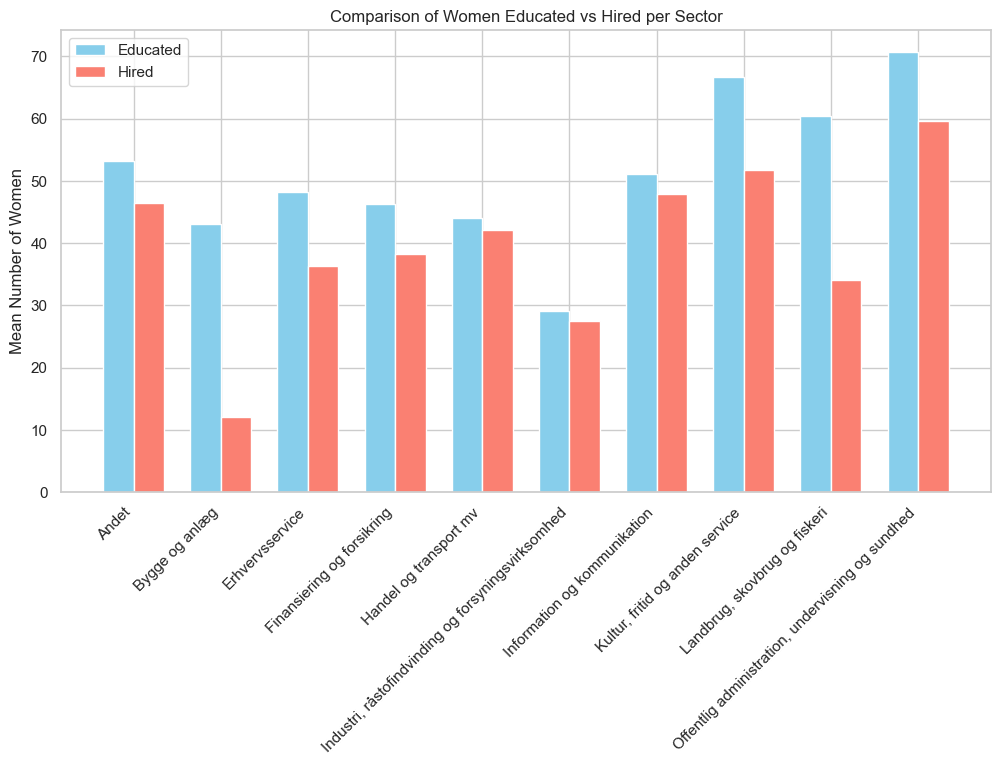

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'Sector': ['Andet', 'Bygge og anlæg', 'Erhvervsservice', 'Finansiering og forsikring', 'Handel og transport mv', 'Industri, råstofindvinding og forsyningsvirksomhed', 'Information og kommunikation', 'Kultur, fritid og anden service', 'Landbrug, skovbrug og fiskeri', 'Offentlig administration, undervisning og sundhed'],
    'Educated': [53.153846, 43.142857, 48.230769, 46.225806, 44.000000, 29.129032, 51.060000, 66.666667, 60.400000, 70.660000],
    'Hired': [46.511538, 12.038095, 36.266667, 38.220000, 42.104167, 27.482468, 47.833600, 51.690909, 34.049057, 59.638462]
}

# Set style
sns.set(style="whitegrid")

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
x = range(len(data['Sector']))

# Bars
ax.bar([i - bar_width/2 for i in x], data['Educated'], width=bar_width, label='Educated', color='skyblue')
ax.bar([i + bar_width/2 for i in x], data['Hired'], width=bar_width, label='Hired', color='salmon')

# Labels and ticks
ax.set_xticks(x)
ax.set_xticklabels(data['Sector'], rotation=45, ha='right')
ax.set_ylabel('Mean Number of Women')
ax.set_title('Comparison of Women Educated vs Hired per Sector')
ax.legend()